In [43]:
import numpy as np
np.random.seed(42)

import pandas as pd
import matplotlib.pyplot as plt
from plotting import *

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [44]:
def generate_dataset():
    num_p = 50
    cov1 = np.array([[1, 0], [0, 2]])
    cov2 = np.array([[2, 0], [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov1, num_p)
    data2 = np.random.multivariate_normal(np.array([2, 2]), cov2, num_p)
    data = np.concatenate((data1, data2), axis=0)
    classes = np.array([-1 for i in range(num_p)] + [1 for i in range(num_p)])
    return data, classes

In [45]:
x,y = generate_dataset()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

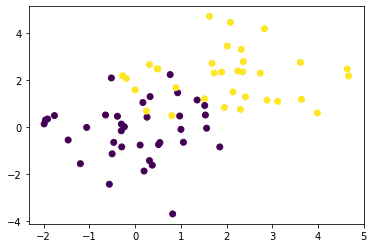

In [46]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

In [47]:
kernel = "rbf"

clf = SVC(kernel=kernel)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


In [48]:
score = clf.score(x_test, y_test)

print(f"Score: {score}")
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred)}")


Score: 0.9333333333333333
Confusion matrix:
 [[12  1]
 [ 1 16]]


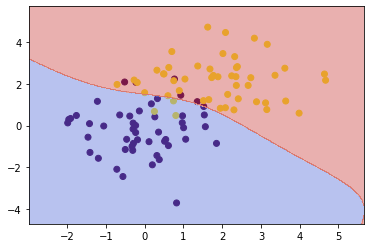

In [49]:
fig, ax = plt.subplots(1,1)
plt.scatter(x[:,0], x[:,1], c=y)
plot_contours(ax, clf, x[:,0], x[:,1], cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()